<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except FileNotFoundError:
    data = pd.read_csv(r'C:\Users\ASUS\Desktop\Практикум\Data\insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data = data.rename(columns = {'Пол':'sex','Возраст':'age','Зарплата':'salary','Члены семьи':'family_members','Страховые выплаты':'insurance_payments'})

In [6]:
data['age'] = data['age'].astype('int64')
data['salary'] = data['salary'].astype('int64')

In [7]:
data.isna().sum()

sex                   0
age                   0
salary                0
family_members        0
insurance_payments    0
dtype: int64

In [8]:
data.duplicated().sum()

153

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   sex                 5000 non-null   int64
 1   age                 5000 non-null   int64
 2   salary              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_payments  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


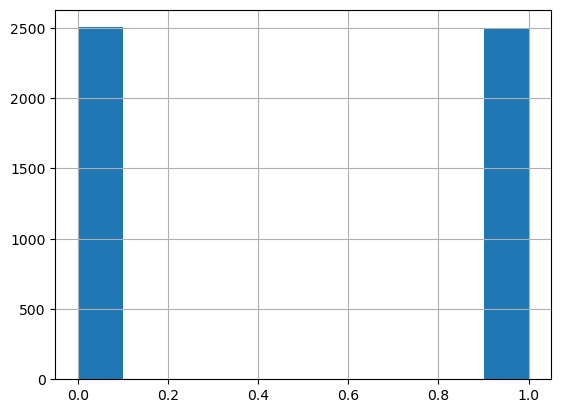

In [10]:
data['sex'].hist();

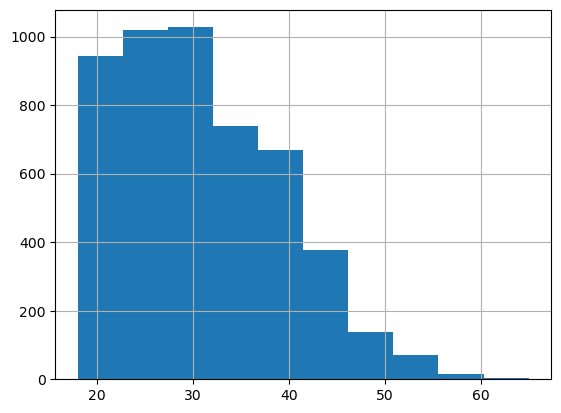

In [11]:
data['age'].hist();

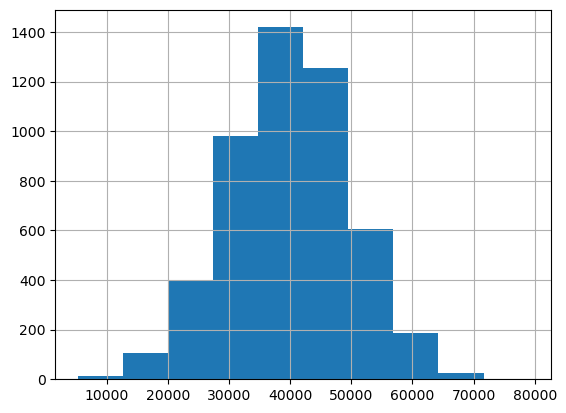

In [12]:
data['salary'].hist();

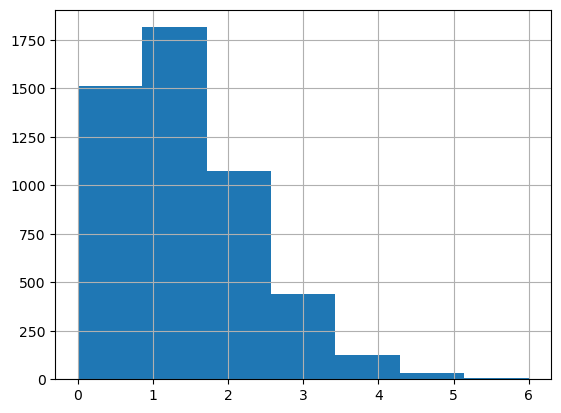

In [13]:
data['family_members'].hist(bins = 7);

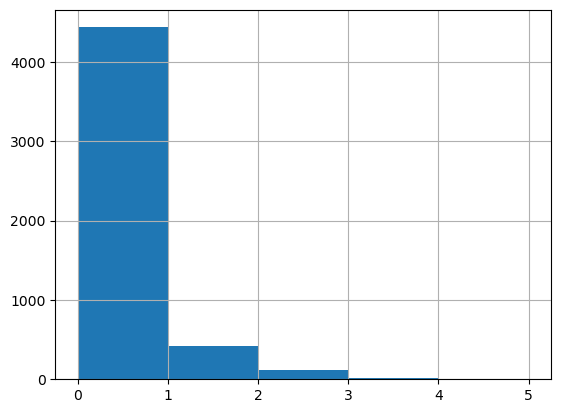

In [14]:
data['insurance_payments'].hist(bins=5);

В первом этапе была проведена работа:
* Изучение данных
* Изменение типа данных в столбцах age и salary
* Приведение назания столбцов к одному формату
* Визуализация данных

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Ответьте на вопрос и обоснуйте решение. 

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 a. Изменится. Приведите примеры матриц.
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  b.

**Обоснование:** Качество линейной регрессии зависит от значений признаков и их взаимосвязи. Если мы умножим признаки на обратимую матрицу, то мы получим новые признаки, которые являются линейной комбинацией исходных признаков. Таким образом, новые признаки будут иметь ту же взаимосвязь, что и исходные признаки, но будут выражены в других координатах.

## Алгоритм преобразования

**Алгоритм**
* Создадим произвольную обратимую матрицу
* Рассчетаем произведение призноков на обратимую матрицу
* Обучим две модели одну с переобразованием данных и одну без
* Сравним метрику R2 для каждой матрицы 

**Обоснование**
Таким образом мы можем зашифровать данные клиента и как сказанно выше качество модели не измениться. Сравнением метрик R2 мы можем подтвердить качество модели 

## Проверка алгоритма

In [15]:
features = data.drop(['insurance_payments'], axis=1)
target = data['insurance_payments']

In [16]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

In [17]:
model = LinearRegression()
model.fit(features_train, target_train)

predictions_train = model.predict(features_test)
r2_train = r2_score(target_test, predictions_train)
print('R2:', r2_train)

R2: 0.39501805497631315


Шанс сгенерировать случайную матрицу каторая не будет обратимой очень мал, но попробуем этого избежать 

In [18]:
matrix = 0
invertible_matrix = 0

In [19]:
while matrix == 0:
    invertible_matrix = np.random.normal(size = (4, 4))
    matrix = np.linalg.det(invertible_matrix)

In [20]:
features_inv_train = features_train.dot(invertible_matrix)
features_inv_test = features_test.dot(invertible_matrix)

In [21]:
model_inv = LinearRegression()
model_inv.fit(features_inv_train, target_train)

predictions_inv_train = model_inv.predict(features_inv_test)
r2v2 = r2_score(target_test, predictions_inv_train)
print('R2:', r2v2)

R2: 0.39501805497624687


In [22]:
print(r2_train-r2v2)

6.628031457012185e-14


        Мы построили две модели линейной регресии по данным страховой компаниию, в одной мы ничего не меняли а во второй мы инвертировали матрицу. Сравнеие матрики R2 покажет на сколько близки модели по качеству и можно ли шифровать данные без потери точности модели.
    
        Как мы видим разница бежду R2 метриками незначительна. Таким образом можно обеспечть безопасность данных клиентов не жертвуя качеством модели 